In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import poisson, gamma

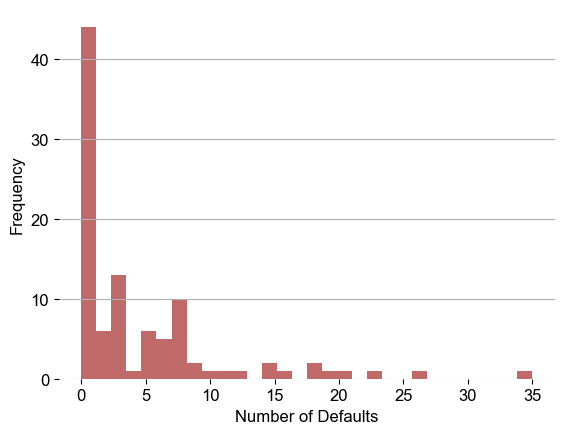

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font type and size
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "12"
plt.rcParams["axes.labelcolor"] = "black"
plt.rcParams["text.color"] = "black"

# Step 1: Generate synthetic data with extreme outcomes

# Parameters for extreme outcomes
alpha = 0.5  # Smaller alpha for more variability
beta = 0.1   # Smaller beta for more variability
n_periods = 100

# Generate Gamma-distributed rates with extreme values
lambda_vals_extreme = np.random.gamma(alpha, 1/beta, n_periods)

# Generate Poisson-distributed defaults with extreme rates
defaults_extreme = np.random.poisson(lambda_vals_extreme)

# Plot the generated data
plt.hist(defaults_extreme, bins=30, alpha=0.7, label='Extreme Defaults', color='brown')
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add y-axis gridlines

# Remove the box around the plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

In [4]:
# Fit a simple Poisson model
lambda_simple = np.mean(defaults_extreme)

print(f'Simple Poisson model rate (lambda): {lambda_simple}')

Simple Poisson model rate (lambda): 5.15


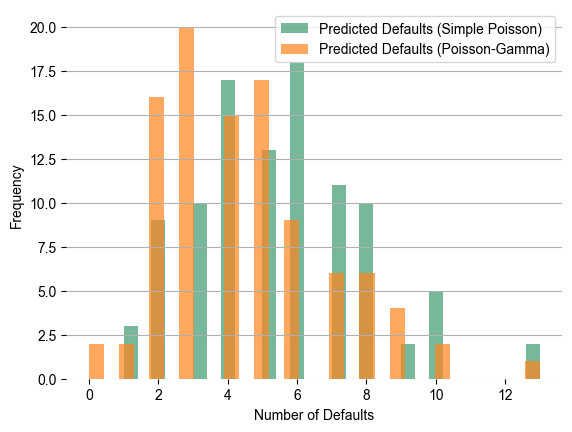

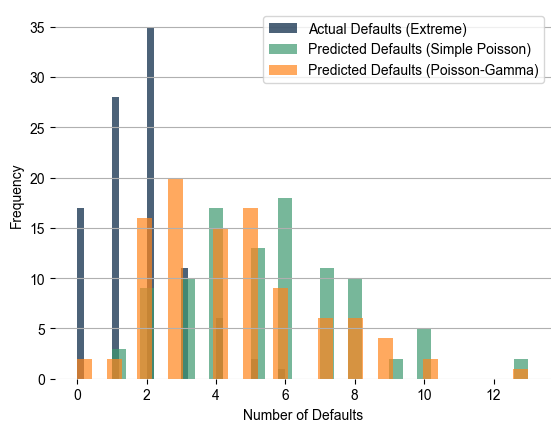

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Set the font type and size
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "10"

# Predict future defaults using the simple Poisson model
pred_defaults_simple = np.random.poisson(lambda_simple, n_periods)

# Predict future defaults using the updated Poisson-Gamma model
pred_lambda_extreme = np.random.gamma(alpha + np.sum(defaults_extreme), 1/(beta + n_periods), n_periods)
pred_defaults_extreme = np.random.poisson(pred_lambda_extreme)

# Plot the predicted defaults from both models
plt.hist(pred_defaults_simple, bins=30, alpha=0.7, label='Predicted Defaults (Simple Poisson)', color='#3d9970')
plt.hist(pred_defaults_extreme, bins=30, alpha=0.7, label='Predicted Defaults (Poisson-Gamma)', color='#ff851b')
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add y-axis gridlines
plt.legend(loc='upper right')  # Move the legend to the top right corner

# Remove the box around the plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

# Compare predicted vs. actual for extreme outcomes
actual_defaults_extreme = np.random.poisson(np.random.gamma(alpha, 1/beta), n_periods)
plt.hist(actual_defaults_extreme, bins=30, alpha=0.7, label='Actual Defaults (Extreme)', color='#001f3f')  # Navy
plt.hist(pred_defaults_simple, bins=30, alpha=0.7, label='Predicted Defaults (Simple Poisson)', color='#3d9970')  # Olive
plt.hist(pred_defaults_extreme, bins=30, alpha=0.7, label='Predicted Defaults (Poisson-Gamma)', color='#ff851b')  # Coral
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.grid(axis='y')  # Add y-axis gridlines
plt.legend(loc='upper right')  # Move the legend to the top right corner

# Remove the box around the plot
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Estimated lambda (Poisson): 4.94
Estimated lambda (Poisson-Gamma): 4.910891089108911


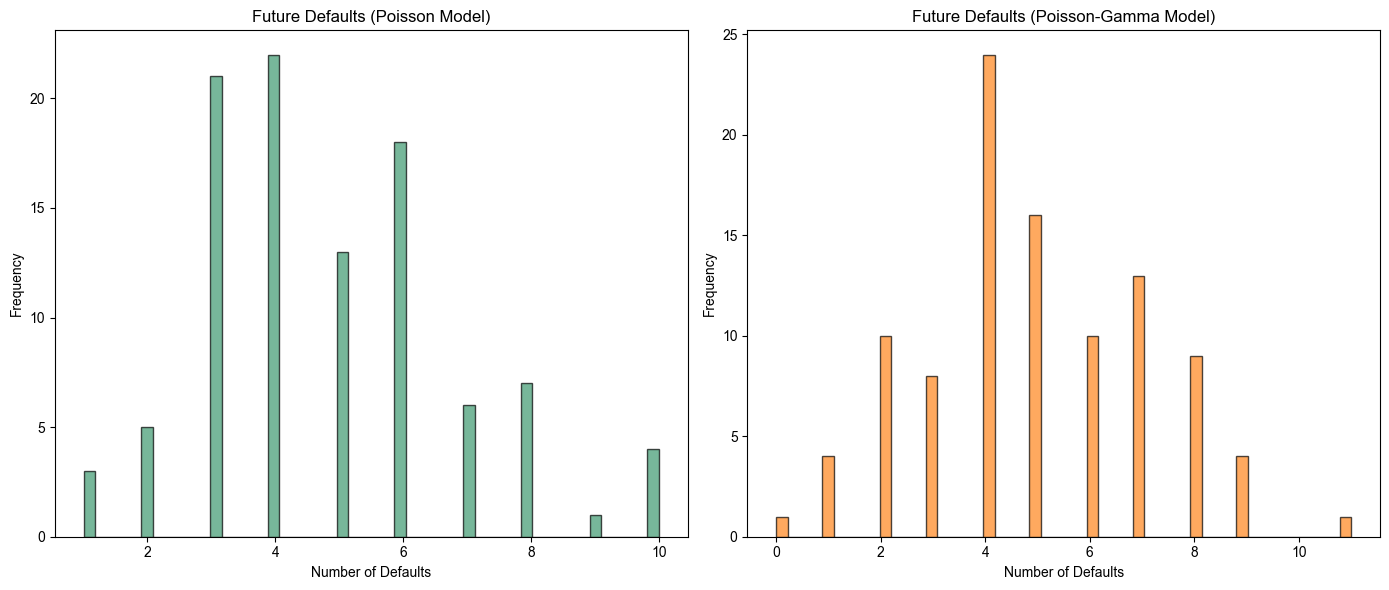

Poisson Model - Mean: 4.84, Variance: 4.1743999999999994
Poisson-Gamma Model - Mean: 4.94, Variance: 4.776400000000001


In [31]:
# Set the font type and size
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = "10"

# Parameters for the extremely stable environment
true_lambda = 5.0  # True default rate
num_periods = 100  # Number of periods to simulate (large sample size)

# Simulate default counts with very low variance
np.random.seed(42)  # For reproducibility
default_counts = np.random.poisson(true_lambda, num_periods)

# Estimate lambda for Poisson model
lambda_poisson = np.mean(default_counts)
print(f"Estimated lambda (Poisson): {lambda_poisson}")

# Initial prior parameters for Gamma distribution
alpha_prior = 2.0
beta_prior = 1.0

# Update Gamma parameters based on observed data
alpha_post = alpha_prior + np.sum(default_counts)
beta_post = beta_prior + num_periods

# Posterior mean of lambda
lambda_gamma = alpha_post / beta_post
print(f"Estimated lambda (Poisson-Gamma): {lambda_gamma}")

# Number of future periods to simulate
num_future_periods = 100

# Simulate future defaults using Poisson model
future_defaults_poisson = np.random.poisson(lambda_poisson, num_future_periods)

# Simulate future defaults using Poisson-Gamma model
future_lambda_gamma = np.random.gamma(alpha_post, 1 / beta_post, num_future_periods)
future_defaults_gamma = np.random.poisson(future_lambda_gamma)

# Plotting the histograms
plt.figure(figsize=(14, 6))

# Histogram for future defaults using Poisson model
plt.subplot(1, 2, 1)
plt.hist(future_defaults_poisson, bins=50, alpha=0.7, color='#3d9970', edgecolor='black')  # Olive
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.title('Future Defaults (Poisson Model)')

# Histogram for future defaults using Poisson-Gamma model
plt.subplot(1, 2, 2)
plt.hist(future_defaults_gamma, bins=50, alpha=0.7, color='#ff851b', edgecolor='black')  # Coral
plt.xlabel('Number of Defaults')
plt.ylabel('Frequency')
plt.title('Future Defaults (Poisson-Gamma Model)')

plt.tight_layout()
plt.show()

# Summary statistics
mean_poisson = np.mean(future_defaults_poisson)
var_poisson = np.var(future_defaults_poisson)
mean_gamma = np.mean(future_defaults_gamma)
var_gamma = np.var(future_defaults_gamma)

print(f"Poisson Model - Mean: {mean_poisson}, Variance: {var_poisson}")
print(f"Poisson-Gamma Model - Mean: {mean_gamma}, Variance: {var_gamma}")